In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy

%matplotlib inline
print("Test")

Test


In [4]:
#Load Data
df = pd.read_csv("Nestle.csv", sep = ",")
df

,Symbol,Date,Open,High,Low,Close,Volume
0,NESTLE,1-Sep-22,5780.00,5800.00,5711.0,5729.00,200
1,NESTLE,2-Sep-22,5638.13,5764.99,5620.0,5764.99,160
2,NESTLE,7-Sep-22,5760.00,5760.00,5760.0,5760.00,20
3,NESTLE,8-Sep-22,5760.00,5760.00,5760.0,5760.00,20
4,NESTLE,9-Sep-22,5760.00,5760.00,5760.0,5760.00,40
...,...,...,...,...,...,...,...
114,NESTLE,31-Mar-23,5280.00,5280.00,5015.0,5017.50,60
115,NESTLE,4-Apr-23,5390.90,5390.90,4887.1,5115.00,60
116,NESTLE,5-Apr-23,4950.10,5125.00,4950.1,5125.00,360
117,NESTLE,6-Apr-23,5200.00,5225.00,5030.0,5198.20,460


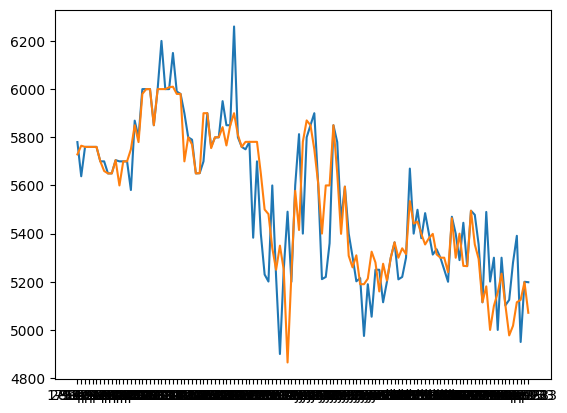

In [5]:
#Make Graphs to show data
opens = df.iloc[:, 2]
dates = df.iloc[:, 1]
closes = df.iloc[:, 5]

#plot opens
plt.plot(dates, opens)
plt.plot(dates, closes)

In [6]:
#Data Normalization - stock_return
numEntries = df.shape[0]
stock_returns = []
dates = df.iloc[:, 1].tail(-1)
for i in range(1, numEntries):
    currentClose = df.loc[i, "Close"]
    #print(currentClose)
    prevClose = df.loc[i - 1, "Close"]
    stock_return = (currentClose - prevClose)/prevClose
    stock_returns.append(stock_return)

df_stockRet = pd.DataFrame(dates)
df_stockRet.rename(columns = {'Date':'Date2'}, inplace = True)
df_stockRet["Stock Return"] = stock_returns
df_stockRet

,Date2,Stock Return
1,2-Sep-22,0.006282
2,7-Sep-22,-0.000866
3,8-Sep-22,0.000000
4,9-Sep-22,0.000000
5,13-Sep-22,0.000000
...,...,...
114,31-Mar-23,0.008056
115,4-Apr-23,0.019432
116,5-Apr-23,0.001955
117,6-Apr-23,0.014283


In [7]:
#Data Normalization - Z score
# zScore = (current - Mean)/std

opens = df.iloc[:, 2].tail(-1)
z_score = []
opensMean = df["Open"].mean()
openStd = df["Open"].std()

for i in range(1, df.shape[0]):
    std = (df.loc[i, "Open"] - opensMean)/openStd
    z_score.append(std)

df_stockRet["Z-Score"] = z_score
#print(df_stockRet.to_string())
df_stockRet

,Date2,Stock Return,Z-Score
1,2-Sep-22,0.006282,0.336149
2,7-Sep-22,-0.000866,0.737363
3,8-Sep-22,0.000000,0.737363
4,9-Sep-22,0.000000,0.737363
5,13-Sep-22,0.000000,0.737363
...,...,...,...
114,31-Mar-23,0.008056,-0.842866
115,4-Apr-23,0.019432,-0.477767
116,5-Apr-23,0.001955,-1.928944
117,6-Apr-23,0.014283,-1.106237


In [8]:
#Identify Outliers

#Identify where z-score is < -1 or > 1
outlier = []
for i in range(1, df_stockRet.shape[0] +1):
    #print(df_stockRet.loc[i, "Z-Score"])
    if(df_stockRet.loc[i, "Z-Score"] > 1 or df_stockRet.loc[i, "Z-Score"] < -1):
        outlier.append(1)
    else:
        outlier.append(0)
#print(outlier)
df_stockRet["isOutlier"] = outlier
print(df_stockRet.to_string())

         Date2  Stock Return   Z-Score  isOutlier
1     2-Sep-22      0.006282  0.336149          0
2     7-Sep-22     -0.000866  0.737363          0
3     8-Sep-22      0.000000  0.737363          0
4     9-Sep-22      0.000000  0.737363          0
5    13-Sep-22      0.000000  0.737363          0
6    14-Sep-22     -0.010417  0.539834          0
7    15-Sep-22     -0.007018  0.539834          0
8    20-Sep-22     -0.001767  0.375227          0
9    22-Sep-22      0.000000  0.375227          0
10   23-Sep-22      0.009735  0.556295          0
11   26-Sep-22     -0.018405  0.539834          0
12   27-Sep-22      0.017857  0.539834          0
13    4-Oct-22      0.000000  0.539834          0
14    6-Oct-22      0.008772  0.148069          0
15   10-Oct-22      0.017391  1.096207          1
16   11-Oct-22     -0.011966  0.869049          0
17   12-Oct-22      0.034602  1.527478          1
18   14-Oct-22      0.003344  1.527478          1
19   17-Oct-22      0.000000  1.527478          1


In [9]:
#Drop First Row
df.drop(index=0, axis=0, inplace=True)
dfconcat = pd.concat([df, df_stockRet.loc[:, {"Stock Return", "Z-Score", "isOutlier"}]], axis = 1)
dfconcat

,Symbol,Date,Open,High,Low,Close,Volume,Z-Score,isOutlier,Stock Return
1,NESTLE,2-Sep-22,5638.13,5764.99,5620.0,5764.99,160,0.336149,0,0.006282
2,NESTLE,7-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,-0.000866
3,NESTLE,8-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,0.000000
4,NESTLE,9-Sep-22,5760.00,5760.00,5760.0,5760.00,40,0.737363,0,0.000000
5,NESTLE,13-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
114,NESTLE,31-Mar-23,5280.00,5280.00,5015.0,5017.50,60,-0.842866,0,0.008056
115,NESTLE,4-Apr-23,5390.90,5390.90,4887.1,5115.00,60,-0.477767,0,0.019432
116,NESTLE,5-Apr-23,4950.10,5125.00,4950.1,5125.00,360,-1.928944,1,0.001955
117,NESTLE,6-Apr-23,5200.00,5225.00,5030.0,5198.20,460,-1.106237,1,0.014283


In [10]:
df_Norm = dfconcat[dfconcat["isOutlier"] == 0]
df_Norm

,Symbol,Date,Open,High,Low,Close,Volume,Z-Score,isOutlier,Stock Return
1,NESTLE,2-Sep-22,5638.13,5764.99,5620.0,5764.99,160,0.336149,0,0.006282
2,NESTLE,7-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,-0.000866
3,NESTLE,8-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,0.000000
4,NESTLE,9-Sep-22,5760.00,5760.00,5760.0,5760.00,40,0.737363,0,0.000000
5,NESTLE,13-Sep-22,5760.00,5760.00,5760.0,5760.00,20,0.737363,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
107,NESTLE,21-Mar-23,5490.00,5490.00,4752.0,5181.00,60,-0.151516,0,0.012903
109,NESTLE,24-Mar-23,5299.99,5300.00,5100.1,5100.10,240,-0.777056,0,0.019989
111,NESTLE,28-Mar-23,5300.00,5300.00,5200.1,5233.70,60,-0.777023,0,0.015257
114,NESTLE,31-Mar-23,5280.00,5280.00,5015.0,5017.50,60,-0.842866,0,0.008056


In [11]:
df_NormalKnn = df_Norm.loc[:, {"Open", "High", "Low", "Close", "Stock Return"}]
df_NormalKnn

,High,Low,Open,Stock Return,Close
1,5764.99,5620.0,5638.13,0.006282,5764.99
2,5760.00,5760.0,5760.00,-0.000866,5760.00
3,5760.00,5760.0,5760.00,0.000000,5760.00
4,5760.00,5760.0,5760.00,0.000000,5760.00
5,5760.00,5760.0,5760.00,0.000000,5760.00
...,...,...,...,...,...
107,5490.00,4752.0,5490.00,0.012903,5181.00
109,5300.00,5100.1,5299.99,0.019989,5100.10
111,5300.00,5200.1,5300.00,0.015257,5233.70
114,5280.00,5015.0,5280.00,0.008056,5017.50


In [12]:
#Split into target - Normalized Data
T = df_NormalKnn.loc[:, 'Stock Return'].copy()
X = df_NormalKnn.loc[:, {"Open", "High", "Low", "Close"}].copy()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size = 0.20, train_size = 0.80, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knnReg = KNeighborsRegressor(algorithm = 'auto', metric='minkowski', n_jobs=1, n_neighbors = 5, p =2, weights = 'uniform')
knnReg.fit(X_train, t_train)

train_score = knnReg.score(X_train, t_train)
test_score = knnReg.score(X_test, t_test)
print(train_score)
print(test_score)

0.30350339776278845
0.2813397885332858


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = knnReg.predict(X_test)

RMSE = mean_squared_error(t_test, y_test, squared = True)
MAE = mean_absolute_error(t_test, y_test)


print(RMSE)
print(MAE)



0.0006981837273091508
0.018611819893122168


In [16]:
# 3, 5, 7, 9, 11
df_res = []
df_NumNeighbors = []
for i in range(3, 12, 2):
    df_NumNeighbors.append(i)
    knnReg = KNeighborsRegressor(algorithm = 'auto', metric='minkowski', n_jobs=1, n_neighbors = i, p =2, weights = 'uniform')
    knnReg.fit(X_train, t_train)
    
    y_test = knnReg.predict(X_test)
    res = [
    mean_squared_error(t_test, y_test, squared = True),
    mean_absolute_error(t_test, y_test)
    ]
    df_res.append(res)

print("KNN Regressor on Normalized Data")
df_ = pd.DataFrame(df_res, columns= ["RSME","MAE"])
df_["Iteration"] = df_NumNeighbors
display(df_)


KNN Regressor on Normalized Data


,RSME,MAE,Iteration
0,0.000568,0.017331,3
1,0.000545,0.016856,5
2,0.000657,0.018510,7
3,0.000735,0.019139,9
4,0.000698,0.018612,11


Text(0, 0.5, 'Error (MAE)')

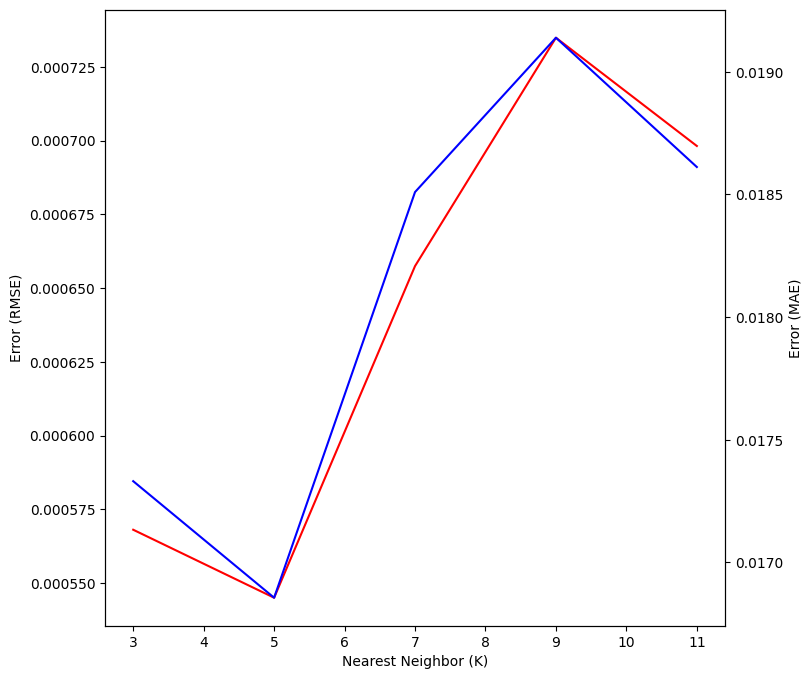

In [17]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(df_["Iteration"], df_["RSME"], color = "red")
ax2.plot(df_["Iteration"], df_["MAE"], color = "blue")
ax1.set_xlabel("Nearest Neighbor (K)")
ax1.set_ylabel("Error (RMSE)")
ax2.set_ylabel("Error (MAE)")
# more Neighbors might be better

In [43]:
from sklearn import svm
# SVM
svm = svm.LinearSVR(max_iter = 2200, random_state = 0)

svm.fit(X_train, t_train)
y_test_svm = svm.predict(X_test)

train_score_svm = svm.score(X_train, t_train)
test_score_svm = svm.score(X_test, t_test)

svm_RMSE = mean_squared_error(t_test, y_test_svm, squared = True)
svm_MAE = mean_absolute_error(t_test, y_test_svm)

print("Train Accuracy: ", train_score_svm)
print("Test Accuracy: ",test_score_svm)
print("RMSE: ",svm_RMSE)
print("MAE: ",svm_MAE)

Train Accuracy:  0.2883078551573466
Test Accuracy:  0.14629897602240238
RMSE:  0.0006474051668449311
MAE:  0.01878807185439908


C:\Users\jelle\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(warm_start=True,  oob_score=True, random_state = 0)
#rf.fit(X_train, t_train)

#train_score_rf = rf.score(X_train, t_train)
#test_score_rf = rf.score(X_test, t_test)
    
#print(train_score_rf)
#print(test_score_rf)
